In [152]:
import numpy as np
import matplotlib.pyplot as plt
import random


"""
Definition of the Warehouse Agent environment
"""

class WarehouseAgent():
    def __init__(self):
        """
        Initializing the environment

        """
        self.GRID_DIM = np.array([6,7])
        self.agent_position = np.array([1,2])
        self.box_location = np.array([4,3])
        self.goal_location = np.array([3,1])
        self.action_convert={0:[0,1],1:[0,-1],2:[-1,0],3:[1,0]}
        self.wall=[[0,1],[0,2],[0,3],[0,0],[1,0],[2,0],[3,0],[4,0],[5,0],[6,0],[1,3],[2,3],[2,4],[2,5],[3,5],[4,5],[5,5],[5,3],[5,4],[6,1],[6,2],[6,3]]
        self.stuck_locations=[[1,1],[1,2],[3,4],[4,4],[5,1],[5,2]]
        self.done=False
     
    def reset(self):
        """
        Function to reset the environment at the end of each episode to its initial state configuration
        Returns:
            state: the state of the environment reset to its initial conditions
        """
        self.agent_position = np.array([1,2])
        self.box_location = np.array([4,3])
        self.goal_location = np.array([3,1])
        self.done=False

        return(self.agent_position,self.done)
    
    def step(self, action):
        """Function to control and evaluate the agents' action
        Args:
            action: pass on the action which the agent needs to take at that time step
        Returns:
            new_state: the new state agent reaches after taking the action
            reward: the reward obtained on taking the action
            done: boolean value to determine if episode terminating condition is reached
        """
        cur_action=np.array(self.action_convert[action])
        new_state=self.agent_position+cur_action
        #print(new_state,self.agent_position)
        if list(new_state) in self.wall:
          return(self.agent_position,-0.1,False)
        else:
          #print("-------------")
          if list(new_state)==list(self.box_location):
            box_new_location=self.box_location+cur_action
            if list(box_new_location) in self.wall:
              return(self.agent_position,-0.1,False)
            else:
              self.box_location=box_new_location
              self.agent_position=new_state
              if list(self.box_location)==list(self.goal_location):
                self.done=True
                return(self.agent_position,0,True)
              else:
                if list(self.box_location) not in self.stuck_locations:
                  return(self.agent_position,-0.1,False)
                else:
                  self.done=True
                  return(self.agent_position,-0.1,True)
          else:
            #print("free")
            self.agent_position=new_state
            return(self.agent_position,-0.1,False)

    def render(self):
        """Function to get the simulation of the warehouse agent system
        """
        plt.figure(figsize=(3,3))
        agent_y=7-self.agent_position[0]-1
        agent_x=self.agent_position[1]
        box_x=self.box_location[1]
        box_y=7-self.box_location[0]-1
        end_loc_x=self.goal_location[1]
        end_loc_y=7-self.goal_location[0]-1

        plt.annotate("End",xy=(end_loc_x,end_loc_y))
        plt.annotate("Box",xy=(box_x,box_y))
        plt.annotate("Agent",xy=(agent_x,agent_y))
        plt.scatter(agent_x,agent_y,color="blue")
        plt.scatter(box_x,box_y,color="yellow")
        plt.scatter(end_loc_x,end_loc_y,color="red")

        plt.plot([1,1],[1,6],color="black")
        plt.plot([1,3],[1,1],color="black")
        plt.plot([3,3],[1,2],color="black")
        plt.plot([3,5],[2,2],color="black")
        plt.plot([5,5],[2,4],color="black")
        plt.plot([5,3],[4,4],color="black")
        plt.plot([3,3],[4,6],color="black")
        plt.plot([1,3],[6,6],color="black")

        plt.xlim(-0.1,7)
        plt.ylim(-0.1,7)

        plt.show()
          

In [153]:
agent=WarehouseAgent()

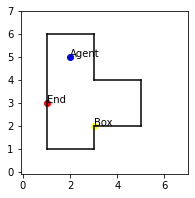

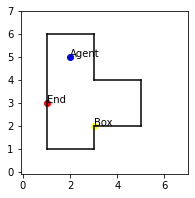

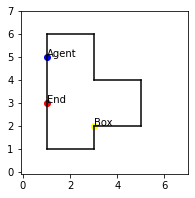

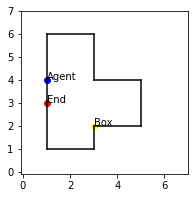

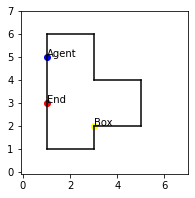

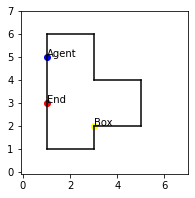

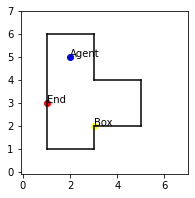

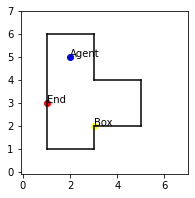

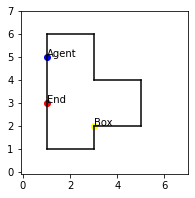

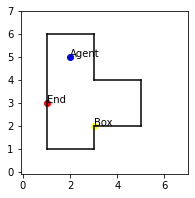

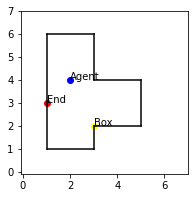

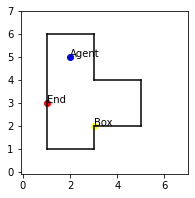

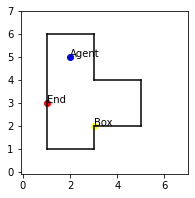

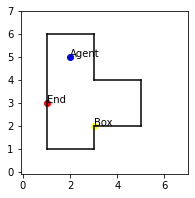

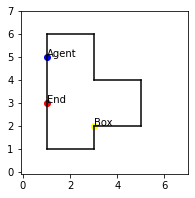

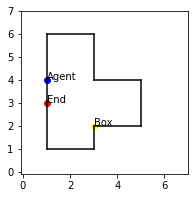

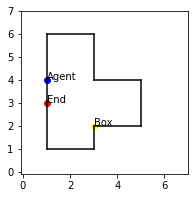

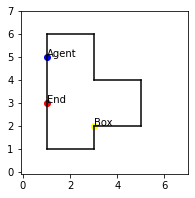

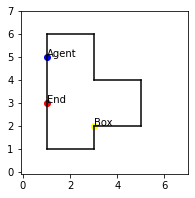

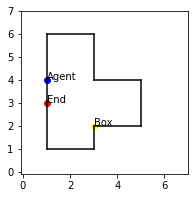

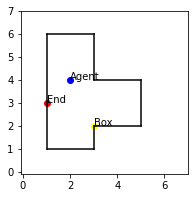

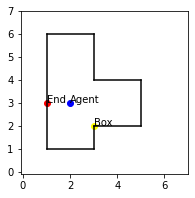

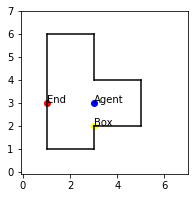

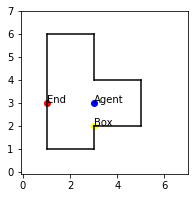

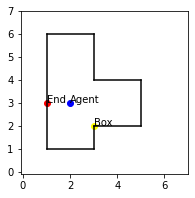

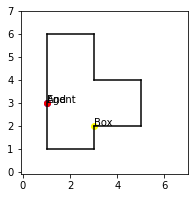

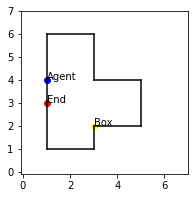

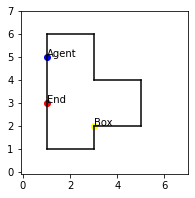

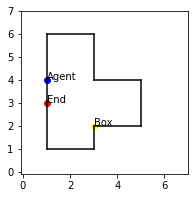

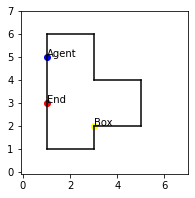

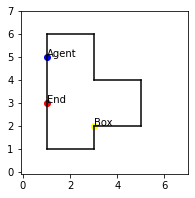

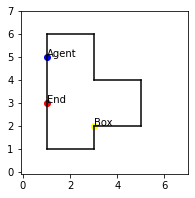

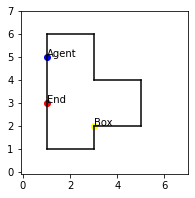

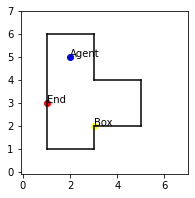

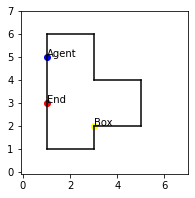

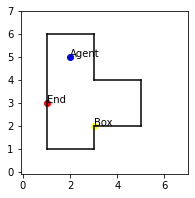

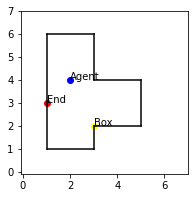

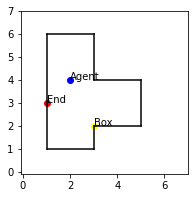

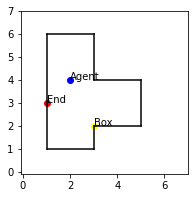

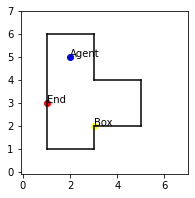

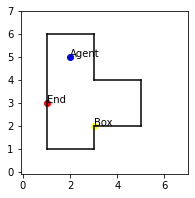

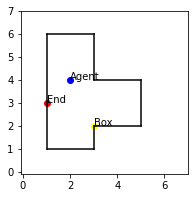

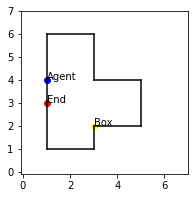

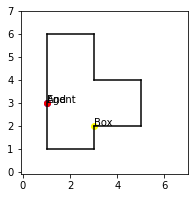

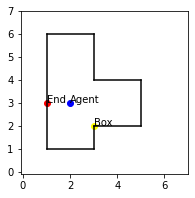

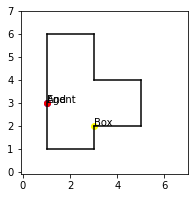

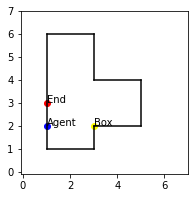

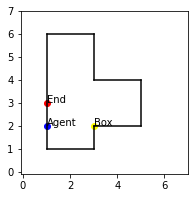

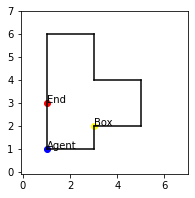

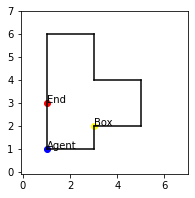

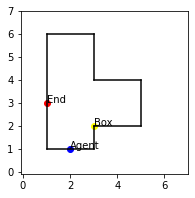

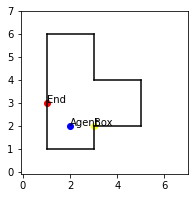

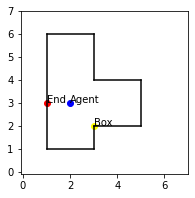

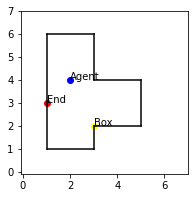

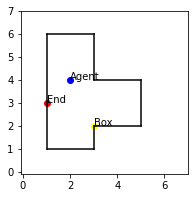

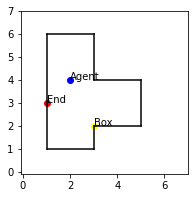

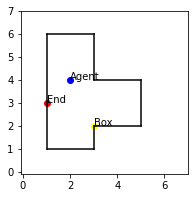

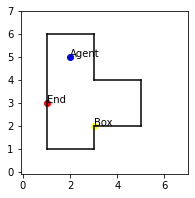

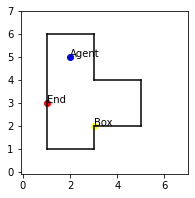

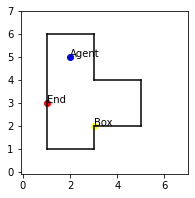

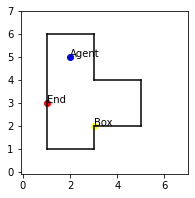

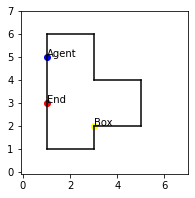

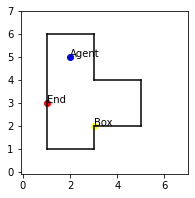

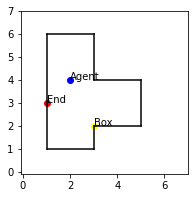

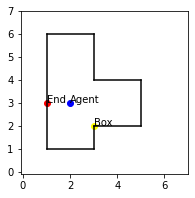

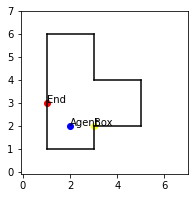

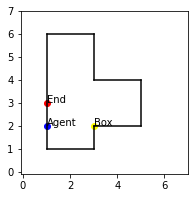

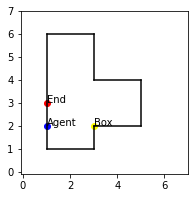

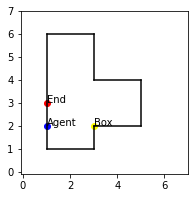

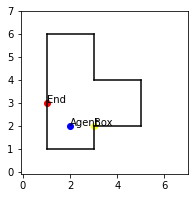

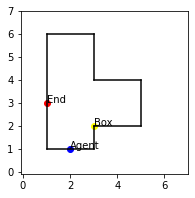

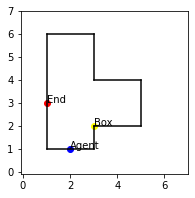

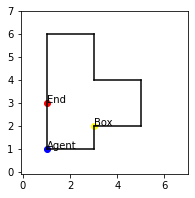

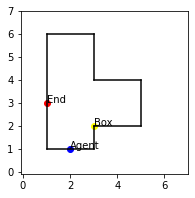

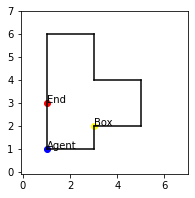

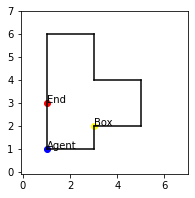

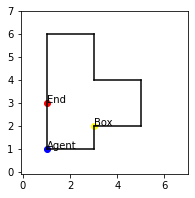

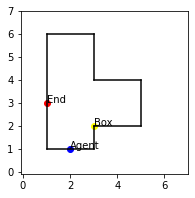

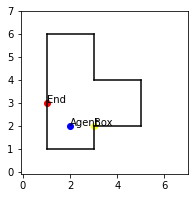

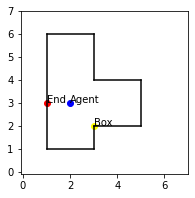

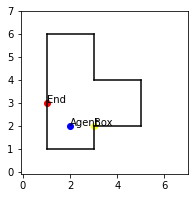

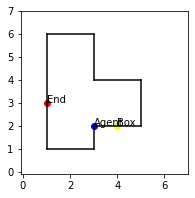

In [155]:
start,done=agent.reset()
while done==False:
  action=random.sample([0,1,2,3],1)[0]
  agent_loc,reward,done=agent.step(action)
  agent.render()